In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [58]:
import pandas as pd
from matplotlib import pyplot as plt
import cv2

In [59]:
df=pd.read_csv("/kaggle/input/diabetic-retinopathy-resized/trainLabels.csv")
df["level"].value_counts()

level
0    25810
2     5292
1     2443
3      873
4      708
Name: count, dtype: int64

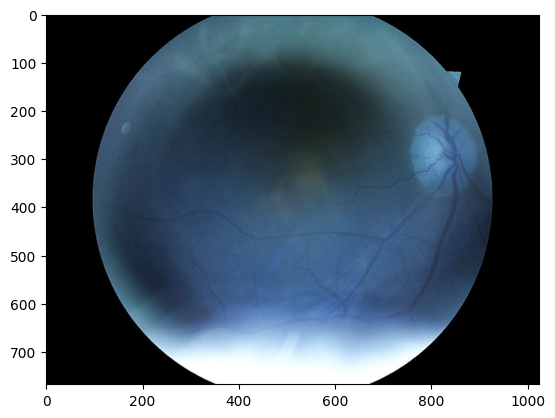

In [90]:
image_path = "/kaggle/input/diabetic-retinopathy-resized/resized_train/resized_train/10014_right.jpeg"
image=cv2.imread(image_path)
image_output=image.copy()
plt.imshow(image_output)

In [61]:
image_output.shape

(683, 1024, 3)

In [62]:
# Hiển thị ảnh 
def show_image(image, title="Image", cmap=None):
    plt.figure(figsize=(6, 6))
    if len(image.shape) == 2:  # Ảnh grayscale
        plt.imshow(image, cmap=cmap)
    else:  # Ảnh màu
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

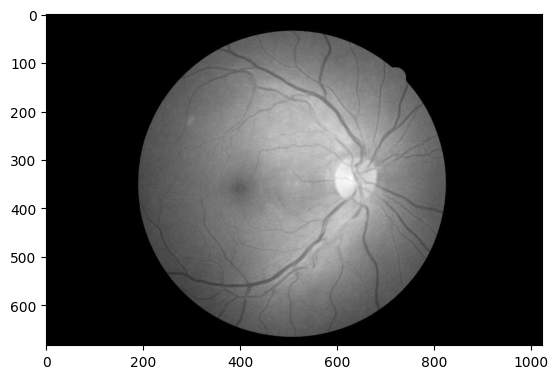

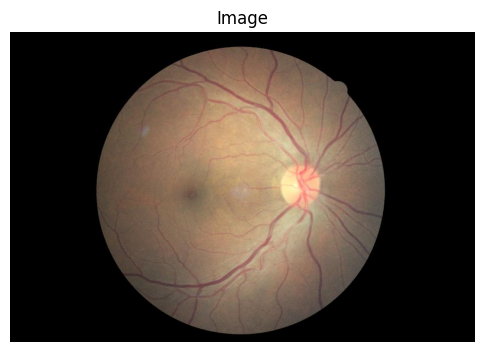

In [64]:
show_image(image_output)

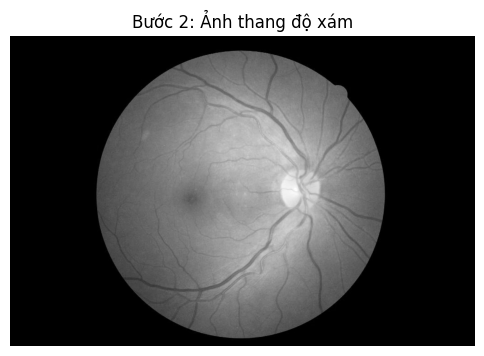

(683, 1024)

In [65]:
 # Bước 2: Chuyển đổi sang thang độ xám
gray = cv2.cvtColor(image_output, cv2.COLOR_BGR2GRAY)
show_image(gray, title="Bước 2: Ảnh thang độ xám", cmap='gray')
gray.shape

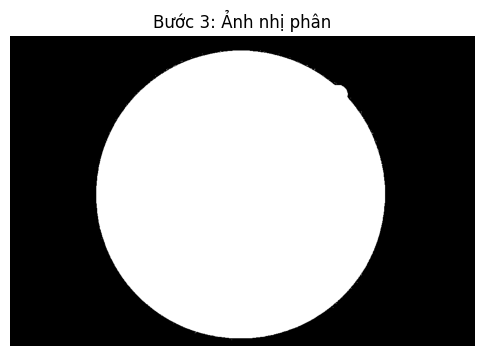

In [66]:
# Bước 3: Áp dụng ngưỡng nhị phân
ret,binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
show_image(binary, title="Bước 3: Ảnh nhị phân", cmap='gray')

In [67]:
binary.shape

(683, 1024)

In [68]:
ret

10.0

In [69]:
 # Bước 4: Tìm đường viền
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if not contours:
    print("Không tìm thấy đường viền!")
        

In [70]:
# Chọn đường viền lớn nhất
cnt = max(contours, key=cv2.contourArea)

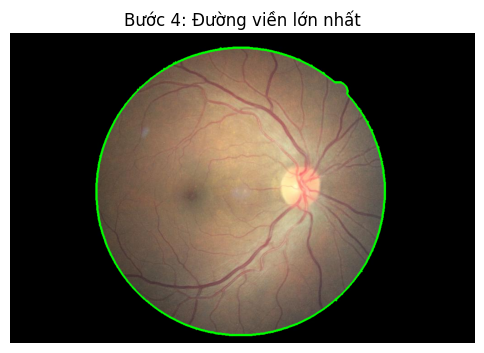

In [71]:
# Vẽ đường viền lên ảnh 
contour_image = image.copy()
cv2.drawContours(contour_image, [cnt], -1, (0, 255, 0), 3)
show_image(contour_image, title="Bước 4: Đường viền lớn nhất")

In [72]:
   # Bước 5: Tìm hình tròn bao quanh
((x, y), r) = cv2.minEnclosingCircle(cnt)
x = int(x)
y = int(y)
r = int(r)
print(x)
print(y)
print(r)


509
345
322


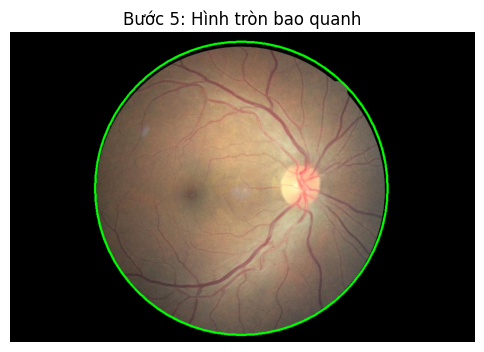

In [73]:
# Vẽ hình tròn lên ảnh để minh họa
circle_image = image.copy()
cv2.circle(circle_image, (x, y), r, (0, 255,0),3)
show_image(circle_image, title="Bước 5: Hình tròn bao quanh")

In [74]:
image_output.shape

(683, 1024, 3)

(644, 644, 3)


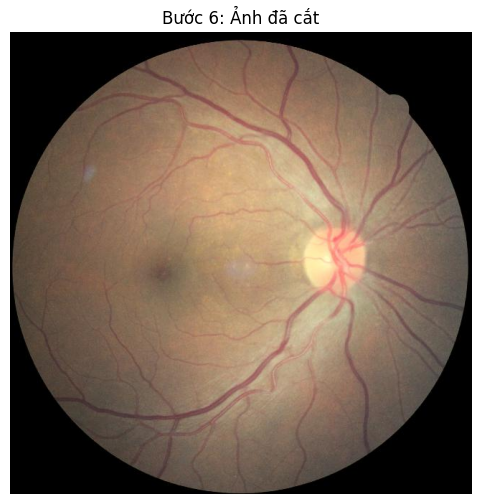

In [75]:
# Bước 6: Kiểm tra bán kính và cắt ảnh
if r > 100:
    if(int(y-r)<=0 or int(y+r)>=int(image_output.shape[0])):
        start_vertical=int(0)
        end_vertical=int(image_output.shape[0])
    else:
        
        start_vertical=int(y-r)
        end_vertical=int(y+r)
    if(int(x-r)<=0 or int(x+r)>=int(image_output.shape[1])):
        
        start_horizontal=int(0)
        end_horizontal=int(image_output.shape[1])
    else:
        
        start_horizontal=int(x-r)
        end_horizontal=int(x+r)
    # Cắt vùng hình vuông bao quanh hình tròn    
    cropped = image_output[start_vertical:end_vertical, start_horizontal:end_horizontal]
    # if new_sz:# Thay đổi kích thước 
    # cropped = cv2.resize(cropped, (new_sz, new_sz))
    print(cropped.shape)
    show_image(cropped, title="Bước 6: Ảnh đã cắt")
else:
    print("Bán kính quá nhỏ!")
        

In [76]:
len(image_output)

683

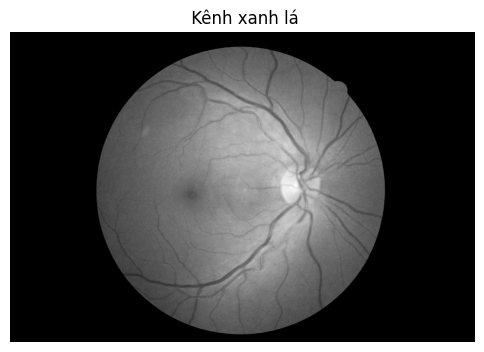

In [77]:
green_channel = image_output[:, :, 1]  # Kênh xanh lá (1 trong BGR)
show_image(green_channel, title=" Kênh xanh lá", cmap='gray')

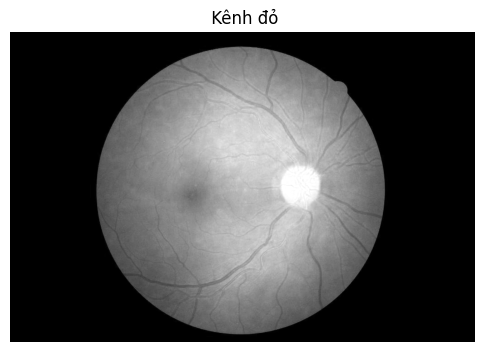

In [78]:
red_channel = image_output[:, :, 2]  # Kênh đỏ (1 trong BGR)
show_image(red_channel, title=" Kênh đỏ", cmap='gray')

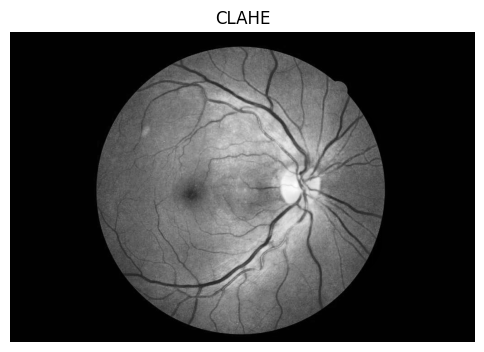

In [79]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(green_channel)
show_image(clahe_image, title="CLAHE", cmap='gray')

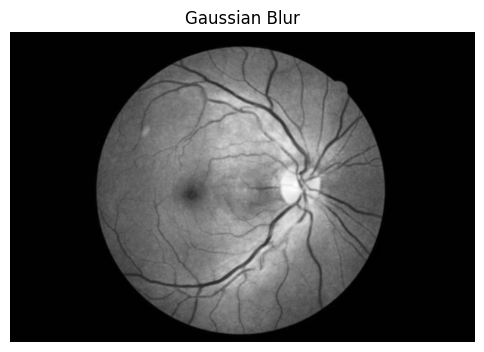

In [80]:
blurred = cv2.GaussianBlur(clahe_image, (5, 5), 0)
show_image(blurred, title="Gaussian Blur", cmap='gray')

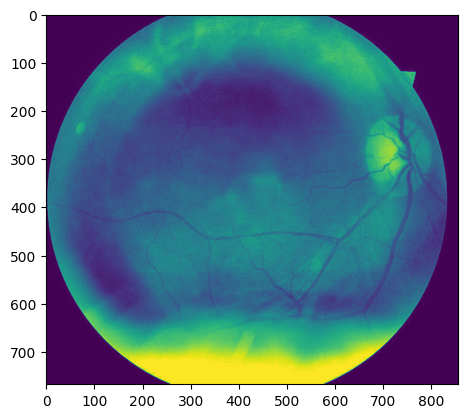

In [92]:
def convert_CLAHE(image):
    # lấy kênh green
    green_channel = image[:, :, 1]  # (1 trong BGR)
    # áp dụng clahe
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(green_channel)

    # Bước 2: Chuyển đổi sang thang độ xám
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Bước 3: Áp dụng ngưỡng nhị phân
    ret,binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

     # Bước 4: Tìm đường viền
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Chọn đường viền lớn nhất
    cnt = max(contours, key=cv2.contourArea)
    # Bước 5: Tìm hình tròn bao quanh
    ((x, y), r) = cv2.minEnclosingCircle(cnt)
    x = int(x)
    y = int(y)
    r = int(r)
    # Bước 6: Kiểm tra bán kính và cắt ảnh
    if r > 100:
        if(int(y-r)<=0 or int(y+r)>=int(image_output.shape[0])):
            start_vertical=int(0)
            end_vertical=int(image_output.shape[0])
        else:
            
            start_vertical=int(y-r)
            end_vertical=int(y+r)
        if(int(x-r)<=0 or int(x+r)>=int(image_output.shape[1])):
            
            start_horizontal=int(0)
            end_horizontal=int(image_output.shape[1])
        else:
            
            start_horizontal=int(x-r)
            end_horizontal=int(x+r)
        # Cắt vùng hình vuông bao quanh hình tròn    
        cropped = clahe_image[start_vertical:end_vertical, start_horizontal:end_horizontal]
        
    plt.imshow(cropped)
    plt.show()
convert_CLAHE(image_output)